### 회귀트리

- 회귀 함수를 기반으로 하지 않고 결정 트리와 같이 트리를 기반으로 하는 회귀 방식
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측
- 리프 노드에서 예측 결정 값을 만드는 과정에서 분류 트리가 특정 클래스 레이블을 결정하는 것과 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산
- 결정트리, 랜덤포레스트, GBM, XGBOOST, LIGHTGBM 등 트리 기반의 알고리즘은 분류뿐만 아니라 회귀도 가능한데 트리 생성이
  CART(Classification And Regression Trees) 에 기반하고 있기 때문이며, CART는 분류뿐만 아니라 회귀도 가능하게 해주는 트리 생성 알고리즘임

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
y_target = boston_df.PRICE
X_data = boston_df.drop('PRICE',axis=1)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mean_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_score = np.sqrt(-1 * neg_mean_scores)
avg_rmse = np.mean(rmse_score)

print('MSE:{}\nRMSE:{}\n평균RMSE:{}'.format(neg_mean_scores, rmse_score, avg_rmse))

MSE:[ -7.88289687 -13.14313491 -20.57389346 -46.22586666 -18.87809457]
RMSE:[2.80764971 3.62534618 4.5358454  6.7989607  4.34489293]
평균RMSE:4.422538982804892


In [ ]:
dt max_depth = 4
rf n_estimators = 1000
gb n_estimators = 1000
xgb n_estimators = 1000
lgb n_estimators = 1000

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor


dt = DecisionTreeRegressor(max_depth=4)
rf = RandomForestRegressor(n_estimators = 1000)
xgb = XGBRegressor(n_estimators = 1000)
lgb = LGBMRegressor(n_estimators = 1000)
gb = GradientBoostingRegressor(n_estimators = 1000)

models = [dt,rf,xgb,lgb,gb]

In [23]:
def reg_model_eval(model, X,y):
    neg_mean_scores = cross_val_score(model, X, y , scoring='neg_mean_squared_error', cv=5)
    rmse_score = np.sqrt(-1 * neg_mean_scores)
    avg_rmse = np.mean(rmse_score)
    
    print('########',model,'############')
    print()
    print('MSE:{}\nRMSE:{}\n평균RMSE:{}'.format(neg_mean_scores, rmse_score, avg_rmse))
    print()
for i in models:
    reg_model_eval(i, X_data, y_target)

######## DecisionTreeRegressor(max_depth=4) ############

MSE:[-11.94208679 -36.25334211 -33.48039047 -46.05422718 -65.56372677]
RMSE:[3.45573245 6.02107483 5.7862242  6.78632649 8.09714312]
평균RMSE:6.029300218483838

######## RandomForestRegressor(n_estimators=1000) ############

MSE:[ -7.95985979 -13.02430712 -21.54740587 -46.90657812 -18.8125987 ]
RMSE:[2.82132235 3.60892049 4.64191834 6.84883772 4.33734927]
평균RMSE:4.451669634195815

######## XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, 

[도전 과제]

캐글의 자전거 대여 수요 예측을 아래와 같이 수행하세요
- 데이터는 https://www.kaggle.com/c/bike-sharing-demand/data 에서 train.csv를 다운로드 받아 이용
- 문자열을 datetime 타입으로 변경
- 종속변수 정규성 개선위한 로그 변환
- 평가지표 : RMSLE, RMSE, MAE
- 'year', 'month', 'day', 'hour' 등의 피쳐들을 OneHotEncoding 하여 회귀모델의 예측 성능 비교

In [206]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/bike_train.csv')

df.head()

df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<AxesSubplot:>

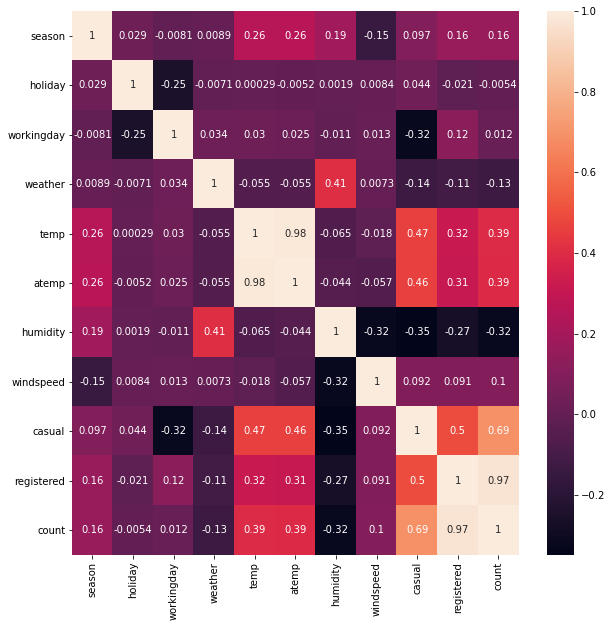

In [191]:
import matplotlib.pyplot as plt

df_corr = df.corr()

plt.figure(figsize=(10,10))

sns.heatmap(df_corr, annot=True)

In [199]:
# datetime 쪼개기

from datetime import datetime 

df['datetime'] = pd.to_datetime(df['datetime']) 

df['Year'] = df['datetime'].dt.year
df['Month'] = df['datetime'].dt.month
df['Day'] = df['datetime'].dt.day
df['Hour'] = df['datetime'].dt.hour
df.drop('datetime',axis=1,inplace=True)
df.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  Year        10886 non-null  int64  
 12  Month       10886 non-null  int64  
 13  Day         10886 non-null  int64  
 14  Hour        10886 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 1.2 MB


In [196]:
for i in features:
    df.i = pd.get_dummies(df[[i]])

df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


In [201]:
df = pd.get_dummies(df, columns=['Year','Month','Day','Hour'])

In [202]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,...,0,0,0,0,0,1,0,0,0,0
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,...,0,0,0,0,0,0,1,0,0,0
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,...,0,0,0,0,0,0,0,1,0,0
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:xlabel='count', ylabel='Count'>

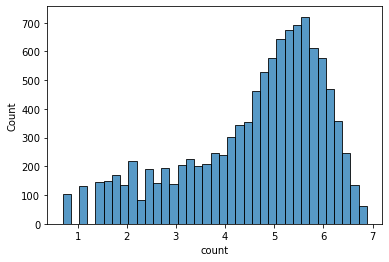

In [203]:
import seaborn as sns

y = df['count']
X = df.drop('count',axis=1)
log_y = np.log1p(y)


sns.histplot(log_y)

In [204]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor


dt = DecisionTreeRegressor(max_depth=4)
rf = RandomForestRegressor(n_estimators = 1000)
xgb = XGBRegressor(n_estimators = 1000)
lgb = LGBMRegressor(n_estimators = 1000)
gb = GradientBoostingRegressor(n_estimators = 1000)

models = [dt,rf,xgb,lgb,gb]

In [205]:
import warnings
warnings.filterwarnings('ignore')

def reg_model_eval(model, X,y):
    neg_mean_scores = cross_val_score(model, X, y , scoring='neg_mean_squared_error', cv=5)
    rmse_score = np.sqrt(-1 * neg_mean_scores)
    avg_rmse = np.mean(rmse_score)
    
    print('########',model,'############')
    print()
    print('MSE:{}\nRMSE:{}\n평균RMSE:{}'.format(neg_mean_scores, rmse_score, avg_rmse))
    print()
    
for i in models:
    reg_model_eval(i, X, log_y)

######## DecisionTreeRegressor(max_depth=4) ############

MSE:[-0.04741959 -0.04132339 -0.03490614 -0.04145833 -0.03896756]
RMSE:[0.2177604  0.20328155 0.18683186 0.20361319 0.19740201]
평균RMSE:0.20177780318711896

######## RandomForestRegressor(n_estimators=1000) ############

MSE:[-1.80449768e-03 -3.14474163e-04 -6.60571018e-05 -2.96588553e-04
 -2.43371744e-04]
RMSE:[0.04247938 0.01773342 0.00812755 0.01722175 0.01560038]
평균RMSE:0.020232494763669413

######## XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, 